In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
df1 = pd.read_csv('w_data.csv', sep=';')
df1

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K
...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.


In [12]:
df2 = pd.read_csv('p_data.csv', sep=';')
df2

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife
...,...,...,...,...,...,...,...,...,...
48837,33.0,Male,597186815,White,United-States,Bachelors,13.0,Never-married,Own-child
48838,39.0,Female,735617153,White,United-States,Bachelors,13.0,Divorced,Not-in-family
48839,64.0,Male,1131807446,Black,United-States,HS-grad,9.0,Widowed,Other-relative
48840,38.0,Male,781422087,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband


In [44]:
#hacemos un merge de datasets teniendo en cuenta contener la totalidad de las filas. df1 48843, df2 48842.
df_merge = pd.merge(df1,df2, on='ID', how='left', indicator=True)
df_merge

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship,_merge
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family,both
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family,both
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband,both
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,White,United-States,Bachelors,13.0,Divorced,Not-in-family,both
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,Black,United-States,HS-grad,9.0,Widowed,Other-relative,both
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,both
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.,44.0,Male,Asian-Pac-Islander,United-States,Bachelors,13.0,Divorced,Own-child,both


In [50]:
df_merge._merge.value_counts()

both          48842
left_only         1
right_only        0
Name: _merge, dtype: int64

<AxesSubplot:>

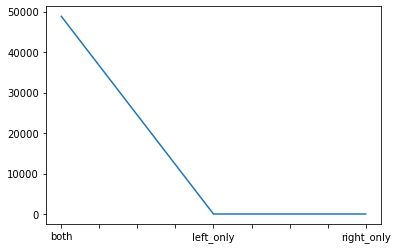

In [56]:
df_merge._merge.value_counts().plot()

In [60]:
for column in df_merge.columns:
    if df_merge[column] = '<=50K':
        df_mayor50.append(column)
    else:
        df_menor50.append(column)

SyntaxError: invalid syntax (Temp/ipykernel_10544/2264825813.py, line 2)

In [21]:
df_concat = pd.concat([df1,df2],axis=1)
df_concat

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39.0,Male,4.908400e+04,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50.0,Male,6.855300e+04,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38.0,Male,1.436540e+05,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53.0,Male,4.151000e+04,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28.0,Female,1.950250e+05,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,Private,215419.0,0.0,0.0,36.0,735617153,<=50K.,39.0,Female,7.356172e+08,White,United-States,Bachelors,13.0,Divorced,Not-in-family
48839,?,321403.0,0.0,0.0,40.0,1131807446,<=50K.,64.0,Male,1.131807e+09,Black,United-States,HS-grad,9.0,Widowed,Other-relative
48840,Private,374983.0,0.0,0.0,50.0,781422087,<=50K.,38.0,Male,7.814221e+08,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
48841,Private,83891.0,5455.0,0.0,40.0,161771296,<=50K.,44.0,Male,1.617713e+08,Asian-Pac-Islander,United-States,Bachelors,13.0,Divorced,Own-child
